In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
df = pd.read_excel("LUKE_ripe_berries_observation_dates.xlsx")

In [73]:
df = df.rename(columns={'berry_type': 'berry'})

df['berry'] = df['berry'].replace(['mustikka', 'puolukka', 'suomuurain'], ['bilberry', 'lingonberry', 'cloudberry'])

df['main_tree_type'] = df['main_tree_type'].replace(['koivu', 'kuusi', 'mänty', 'muu'], ['birch', 'spruce', 'pine', 'other'])

def replace_other_tree_type(row):
    if row['main_tree_type'] == 'other':
        return row['secondary_tree_type'].lower().replace(" ", "")
    else:
        return row['main_tree_type']
    
df['main_tree_type'] = df.apply(replace_other_tree_type, axis=1)

df['main_tree_type'] = df['main_tree_type'].replace(['suo'], 'swamp')
df['main_tree_type'] = df['main_tree_type'].replace(['suota'], 'swamp')
df['main_tree_type'] = df['main_tree_type'].replace(['suopohja'], 'swamp')
df['main_tree_type'] = df['main_tree_type'].replace(['lehtikuusi'], 'larch')
df['main_tree_type'] = df['main_tree_type'].replace(['sekametsä'], 'mixed')
df['main_tree_type'] = df['main_tree_type'].replace(['seka'], 'mixed')
df['main_tree_type'] = df['main_tree_type'].replace(['sekapuusto'], 'mixed')
df['main_tree_type'] = df['main_tree_type'].replace(['aukea'], 'open')
df['main_tree_type'] = df['main_tree_type'].replace(['aukio'], 'open')
df['main_tree_type'] = df['main_tree_type'].replace(['eipuita'], 'open')
df['main_tree_type'] = df['main_tree_type'].replace(['puuton'], 'open')
df['main_tree_type'] = df['main_tree_type'].replace(['vanhaavaivaiskoivua'], 'softbirch')
df['main_tree_type'] = df['main_tree_type'].replace(['vaivaiskoivikko'], 'softbirch')

df['main_tree_type'] = df['main_tree_type'].astype(str)

df = df.drop('secondary_tree_type', axis=1)

df['forest_development_class'] = df['forest_development_class'].replace(['varttunut metsä'], 'old_forest')
df['forest_development_class'] = df['forest_development_class'].replace(['kasvatusmetsä'], 'plantation_forest')
df['forest_development_class'] = df['forest_development_class'].replace(['aukea'], 'clearing')
df['forest_development_class'] = df['forest_development_class'].replace(['taimikko'], 'seedling')

df['year'] = df['observation_date'].dt.year
df['month'] = df['observation_date'].dt.month
df['day'] = df['observation_date'].dt.day
df['week_number'] = df['observation_date'].dt.isocalendar().week


In [74]:
df['forest_development_class'].value_counts()

old_forest           355
plantation_forest    300
clearing             146
seedling              86
Name: forest_development_class, dtype: int64

ValueError: object arrays are not supported

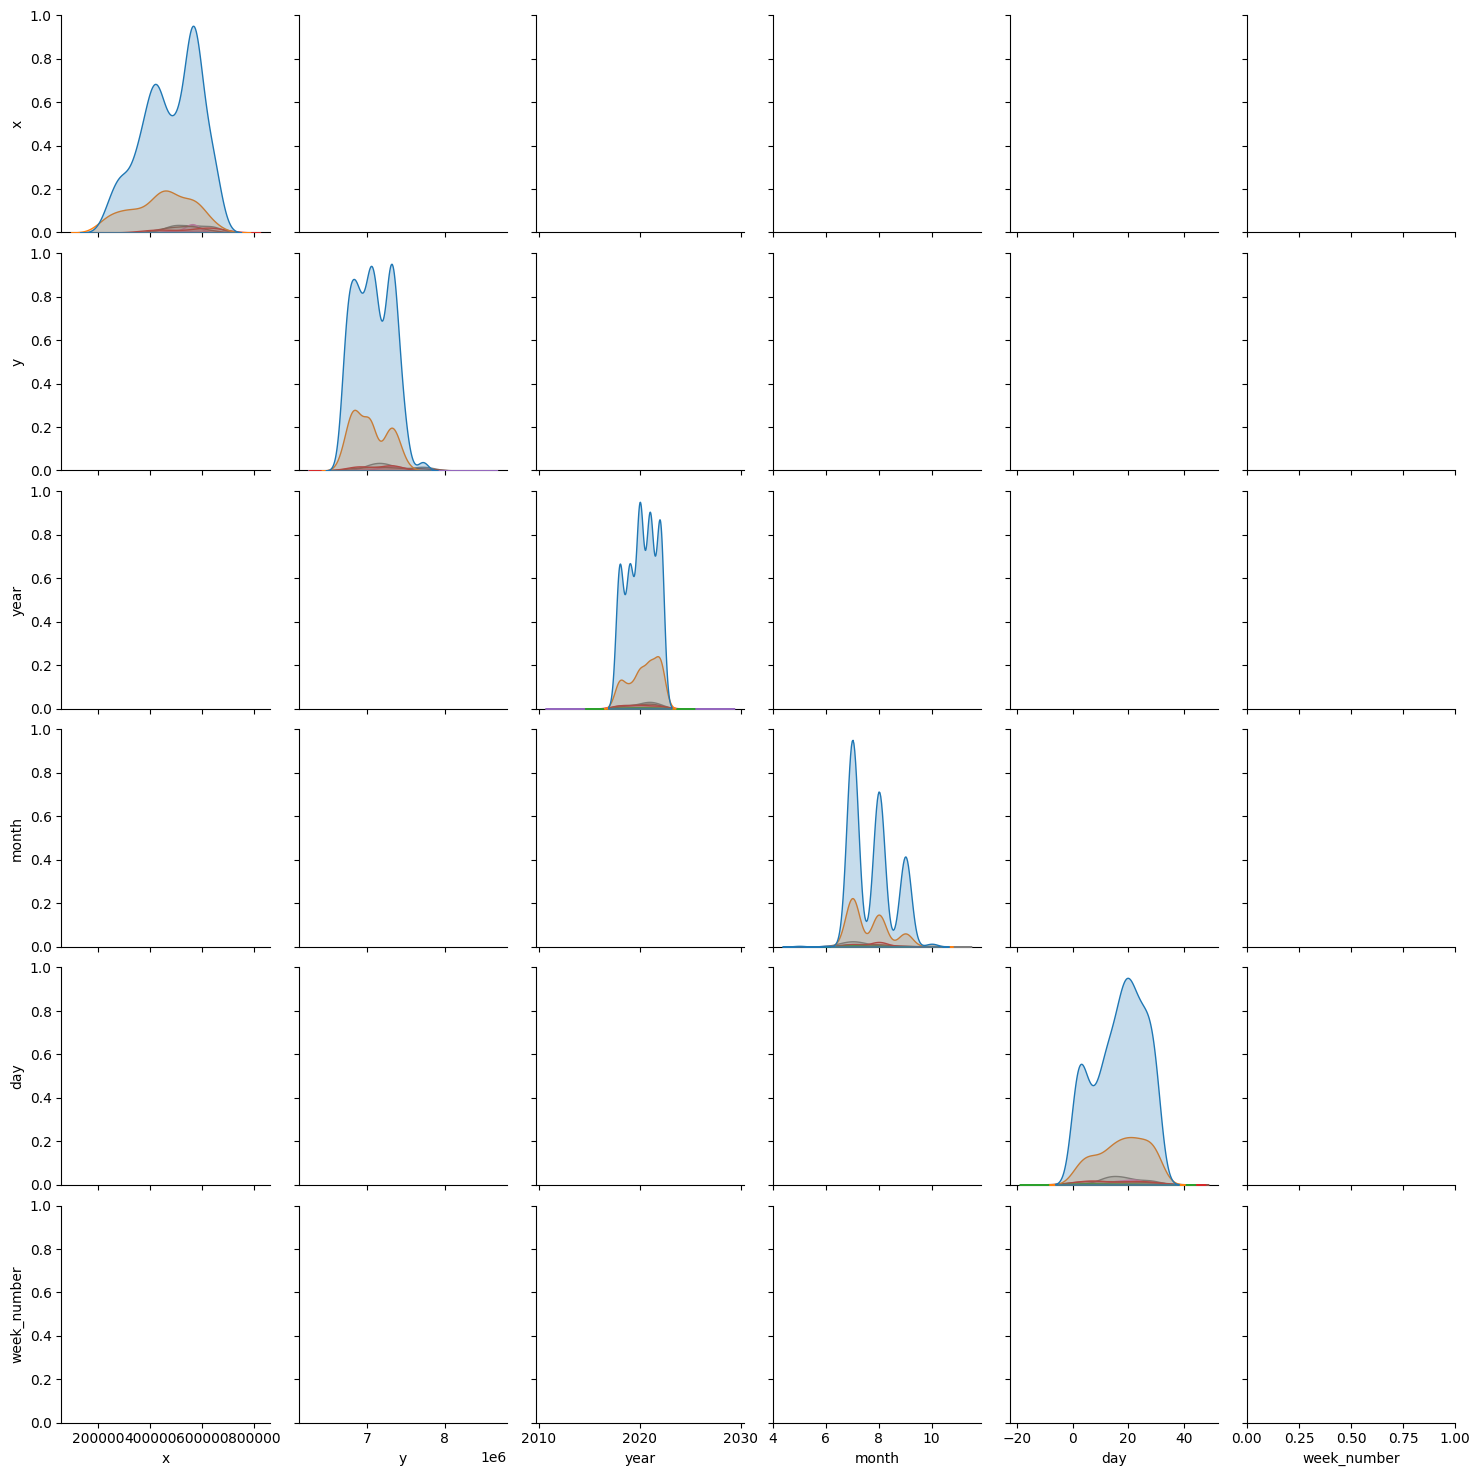

In [76]:
sns.pairplot(df, hue='main_tree_type')